# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

Following approach will be implemented:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition:
In a statement, 
> Given clinical parameters about a patient, can it be predicted whether or not the person have heart disease?


## 2. Data

The original data has been acquired from the Cleveland data from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

A version of data is also available on Kaggle.
https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> In the case of predicting with 95% accuracy if a patient has heart disease or not during the proof of concept, project will be pursued. 

## 4.Features

At this stage different information about each of the features in data will be acquired.

**Create data dictionary**

1. age - age in years\n",
2. sex - (1 = male; 0 = female)\n",
3. cp - chest pain type\n",
    * 0: Typical angina: chest pain related decrease blood supply to the heart\n",
    * 1: Atypical angina: chest pain not related to heart\n",
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)\n",
    * 3: Asymptomatic: chest pain not showing signs of disease\n",
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\n",
5. chol - serum cholestoral in mg/dl\n",
    * serum = LDL + HDL + .2 * triglycerides\n",
    * above 200 is cause for concern\n",
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n",
    * '>126' mg/dL signals diabetes\n",
7. restecg - resting electrocardiographic results\n",
    * 0: Nothing to note\n",
    * 1: ST-T Wave abnormality\n",
        * can range from mild symptoms to severe problems\n",
        * signals non-normal heart beat\n",
    * 2: Possible or definite left ventricular hypertrophy\n",
        * Enlarged heart's main pumping chamber\n",
8. thalach - maximum heart rate achieved\n",
9. exang - exercise induced angina (1 = yes; 0 = no)\n",
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more\n",
11. slope - the slope of the peak exercise ST segment\n",
    * 0: Upsloping: better heart rate with excercise (uncommon)\n",
    * 1: Flatsloping: minimal change (typical healthy heart)\n",
    * 2: Downslopins: signs of unhealthy heart\n",
12. ca - number of major vessels (0-3) colored by flourosopy\n",
    * colored vessel means the doctor can see the blood passing through\n",
    * the more blood movement the better (no clots)\n",
13. thal - thalium stress result\n",
    * 1,3: normal\n",
    * 6: fixed defect: used to be defect but ok now\n",
    * 7: reversable defect: no proper blood movement when excercising\n",
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)"

## Preparing the tools 

Pandas, Matplotlib,and Numpy will be used  for data analysis and manipulation.

In [2]:
# Importing tools that will be utilized

# Regular EDA nad plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic function in order plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (Rows and Columns)

(303, 14)

## Data Exploration (EDA)

 Discover more about the data and become a subject matter expert on the dataset being currently worked on.

 1. What question(s) are attempted to solve
 2. What kind of data available and how to treat different data types?
 3. What is missing from the data and how to deal with it?
 4. Where are the outliers and why should they be taken into consideration?
 5. How can features be added, changed or removed to benefit more out of data?


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Quantity of each class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

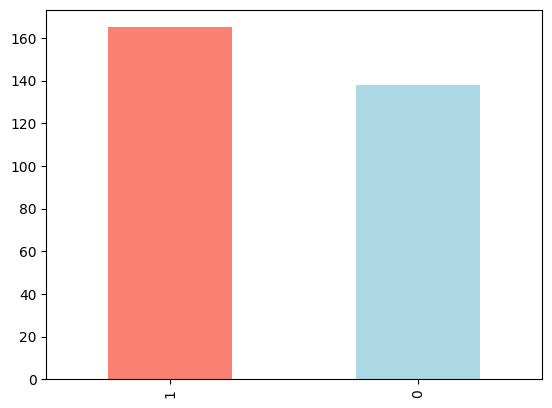

In [11]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking for any missing values
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Finding Patterns
- Trying to gain intuition how the features relate to the target variable
- Figuring out the patterns how target is associated with features


#### Heart Disease Frequency According to Sex

In [6]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Compare target column with Sex column
pd.crosstab(df.target, df.sex) # As a baseline, when we consider sex of patients, the chance for females : almost 75% males :50%

sex,0,1
target,,
0,24,114
1,72,93


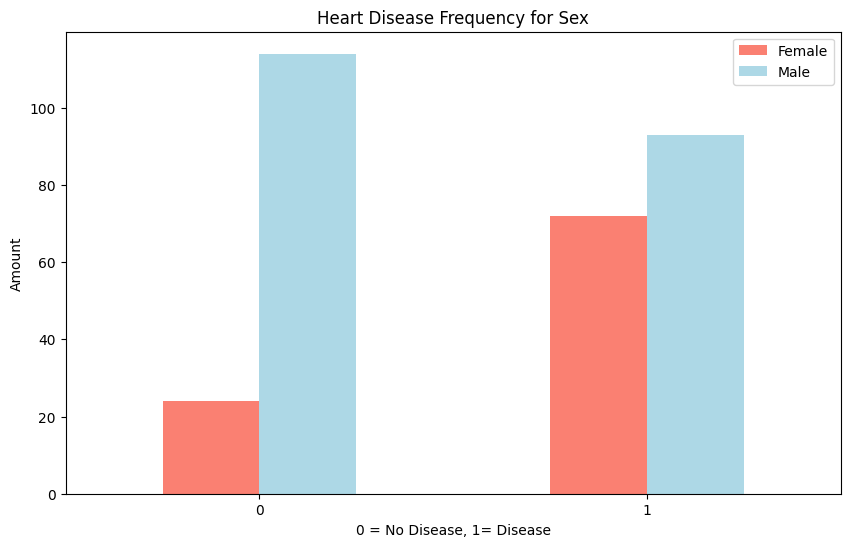

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
